<a href="https://colab.research.google.com/github/mahavir9008/-Coastal-lines-Detection/blob/master/nc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


!pip install PyDrive



In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1m_VrnZJBOxSsPJsjaXeNlOWKUcvwrJ2m"})   # replace the id with id of file you want to access
downloaded.GetContentFile('imageToDriveExampleCSV.tif')

In [ ]:
!apt install unzip
!unzip S1B_IW_GRDH_1SDV_20200603T183017_20200603T183042_021873_02983D_F938.zip -d .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
unzip:  cannot find or open S1B_IW_GRDH_1SDV_20200603T183017_20200603T183042_021873_02983D_F938.zip, S1B_IW_GRDH_1SDV_20200603T183017_20200603T183042_021873_02983D_F938.zip.zip or S1B_IW_GRDH_1SDV_20200603T183017_20200603T183042_021873_02983D_F938.zip.ZIP.


In [ ]:
!apt install rasterio
from __future__ import division
import math
import rasterio # 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
rasterio is already the newest version (0.36.0-2build5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [ ]:
image_file = "/content/imageToDriveExampleCSV.tif"
satdat = rasterio.open(image_file)


In [ ]:
width_in_projected_units = satdat.bounds.right - satdat.bounds.left
height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 0.007545848386603993, Height: 0.002694945852361741


In [ ]:
xres = (satdat.bounds.right - satdat.bounds.left) / satdat.width
yres = (satdat.bounds.top - satdat.bounds.bottom) / satdat.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

0.0002694945852358569 0.0002694945852361741
Are the pixels square: False


In [ ]:
i = satdat.read()[0] # seems the fifth dim of the image, not sure which band, provides a clear separation of ocean and land

In [ ]:
i # look at the array numbers


array([[0.0216 , 0.0216 , 0.0199 , 0.0199 , 0.0199 , 0.022  , 0.022  ,
        0.022  , 0.0249 , 0.0249 , 0.0249 , 0.0249 , 0.0276 , 0.0276 ,
        0.0276 , 0.0363 , 0.0363 , 0.0363 , 0.0274 , 0.0274 , 0.0274 ,
        0.081  , 0.081  , 0.081  , 0.081  , 0.10145, 0.10145, 0.10145],
       [0.0258 , 0.0258 , 0.02   , 0.02   , 0.02   , 0.0237 , 0.0237 ,
        0.0237 , 0.0301 , 0.0301 , 0.0301 , 0.0301 , 0.0378 , 0.0378 ,
        0.0378 , 0.0366 , 0.0366 , 0.0366 , 0.0326 , 0.0326 , 0.0326 ,
        0.0959 , 0.0959 , 0.0959 , 0.0959 , 0.1086 , 0.1086 , 0.1086 ],
       [0.0258 , 0.0258 , 0.02   , 0.02   , 0.02   , 0.0237 , 0.0237 ,
        0.0237 , 0.0301 , 0.0301 , 0.0301 , 0.0301 , 0.0378 , 0.0378 ,
        0.0378 , 0.0366 , 0.0366 , 0.0366 , 0.0326 , 0.0326 , 0.0326 ,
        0.0959 , 0.0959 , 0.0959 , 0.0959 , 0.1086 , 0.1086 , 0.1086 ],
       [0.0415 , 0.0415 , 0.0324 , 0.0324 , 0.0324 , 0.0264 , 0.0264 ,
        0.0264 , 0.0264 , 0.032  , 0.032  , 0.032  , 0.0352 , 0.0352 ,
   

In [ ]:
print(i.min())
print(i.max())


0.008
0.142


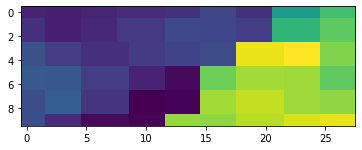

In [ ]:

from matplotlib import pyplot as plt
# Use imshow plot image.
fig = plt.imshow(i)

# Display the results.
plt.show()



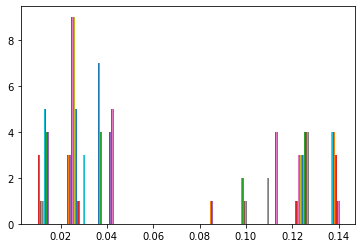

In [ ]:
plt.hist(i);

In [ ]:
import numpy as np
B = np.where(i > 0.06, 1, 0)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
0
1


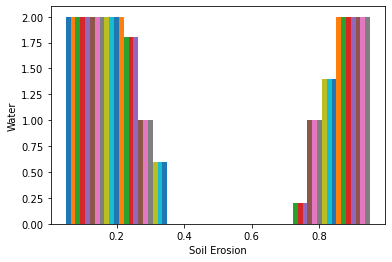

In [ ]:
print(B)
print(B.min())
print(B.max())
plt.hist(B,density=True, bins=2)
plt.ylabel('Water')
plt.xlabel('Soil Erosion');

In [ ]:
downloaded = drive.CreateFile({'id':"1MPkRIcLcBfXwMWJhHJtQL_xNxNu6XOtY"})   # replace the id with id of file you want to access
downloaded.GetContentFile('second_slot.tif')

In [ ]:
i = satdat.read()[0]

In [ ]:
i

array([[0.0216 , 0.0216 , 0.0199 , 0.0199 , 0.0199 , 0.022  , 0.022  ,
        0.022  , 0.0249 , 0.0249 , 0.0249 , 0.0249 , 0.0276 , 0.0276 ,
        0.0276 , 0.0363 , 0.0363 , 0.0363 , 0.0274 , 0.0274 , 0.0274 ,
        0.081  , 0.081  , 0.081  , 0.081  , 0.10145, 0.10145, 0.10145],
       [0.0258 , 0.0258 , 0.02   , 0.02   , 0.02   , 0.0237 , 0.0237 ,
        0.0237 , 0.0301 , 0.0301 , 0.0301 , 0.0301 , 0.0378 , 0.0378 ,
        0.0378 , 0.0366 , 0.0366 , 0.0366 , 0.0326 , 0.0326 , 0.0326 ,
        0.0959 , 0.0959 , 0.0959 , 0.0959 , 0.1086 , 0.1086 , 0.1086 ],
       [0.0258 , 0.0258 , 0.02   , 0.02   , 0.02   , 0.0237 , 0.0237 ,
        0.0237 , 0.0301 , 0.0301 , 0.0301 , 0.0301 , 0.0378 , 0.0378 ,
        0.0378 , 0.0366 , 0.0366 , 0.0366 , 0.0326 , 0.0326 , 0.0326 ,
        0.0959 , 0.0959 , 0.0959 , 0.0959 , 0.1086 , 0.1086 , 0.1086 ],
       [0.0415 , 0.0415 , 0.0324 , 0.0324 , 0.0324 , 0.0264 , 0.0264 ,
        0.0264 , 0.0264 , 0.032  , 0.032  , 0.032  , 0.0352 , 0.0352 ,
   

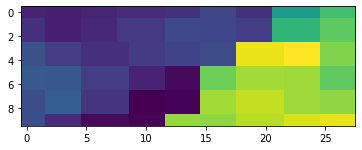

In [ ]:
from matplotlib import pyplot as plt
# Use imshow plot image.
fig = plt.imshow(i)

# Display the results.
plt.show()

In [ ]:

image_file = "./S1B_IW_GRDH_1SDV_20200603T183017_20200603T183042_021873_02983D_F938.SAFE/measurement/s1b-iw-grd-vh-20200603t183017-20200603t183042-021873-02983d-002.tiff"

satdat = rasterio.open(image_file)

RasterioIOError: ignored

In [ ]:
i = satdat.read()[0] 

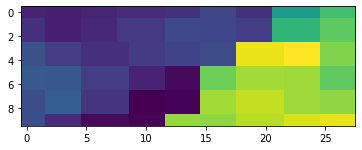

In [ ]:
from matplotlib import pyplot as plt
# Use imshow plot image.
fig = plt.imshow(i)

# Display the results.
plt.show()

In [ ]:
downloaded = drive.CreateFile({'id':"1h37UJRWa4f9YdRVgFVFkhB9JPkd0OiQQ"})   # replace the id with id of file you want to access
downloaded.GetContentFile('2018-01-01-2018-03-31.tif')


In [ ]:
downloaded = drive.CreateFile({'id':"1SHQ3ARyIH5EN2Z7t59r61LCYeVZ3KuMV"})   # replace the id with id of file you want to access
downloaded.GetContentFile('2018-04-01-2018-06-30.tif')

In [ ]:
downloaded = drive.CreateFile({'id':"1XZ3rFHrWE8jBgQETYVyJqa1lmovxKpMr"})   # replace the id with id of file you want to access
downloaded.GetContentFile('2017-10-01-2017-12-31.tif')

In [ ]:
downloaded = drive.CreateFile({'id':"1tqx5V9ydrhzCMBptd7-E0sC5dnYbOnIw"})   # replace the id with id of file you want to access
downloaded.GetContentFile('2017-07-01-2017-09-30.tif')

In [ ]:
downloaded = drive.CreateFile({'id':"1Vs72MjnSHpRmdYuidpJdzNGVVPFlneqE"})   # replace the id with id of file you want to access
downloaded.GetContentFile('2018-01-01-2018-03-31_A.tif')

In [ ]:
downloaded = drive.CreateFile({'id':"16rf81_-3GqIEKbHukdGiDx6LBa3of-t7"})   # replace the id with id of file you want to access
downloaded.GetContentFile('2018-04-01-2018-06-30_A.tif')

In [ ]:
downloaded = drive.CreateFile({'id':"1nL4T8v3bhVUiVzePHl7aZYA8UlPD36he"})   # replace the id with id of file you want to access
downloaded.GetContentFile('2017-07-01-2017-09-30_A.tif')

In [ ]:

downloaded = drive.CreateFile({'id':"1tJi0olMvkuACcWSZcjqyBFp11CT_jac4"})   # replace the id with id of file you want to access
downloaded.GetContentFile('2017-10-01-2017-12-31_A.tif')

In [ ]:
!apt install rasterio
from __future__ import division
import math
import rasterio # 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
rasterio is already the newest version (0.36.0-2build5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [ ]:
first = rasterio.open("/content/2018-01-01-2018-03-31.tif")
second = rasterio.open("/content/2018-04-01-2018-06-30.tif")
third = rasterio.open("/content/2017-07-01-2017-09-30.tif")
fourth = rasterio.open("/content/2017-10-01-2017-12-31.tif")

In [ ]:
ifirst = first.read()[0] 
isecond = second.read()[0] 
ithird = third.read()[0] 
ifourth = fourth.read()[0] 

In [ ]:
firstA = rasterio.open("/content/2018-01-01-2018-03-31_A.tif")
secondA = rasterio.open("/content/2018-04-01-2018-06-30_A.tif")
thirdA = rasterio.open("/content/2017-07-01-2017-09-30_A.tif")
fourthA = rasterio.open("/content/2017-10-01-2017-12-31_A.tif")

In [ ]:
ifirstA = firstA.read()[1] 
isecondA = secondA.read()[0] 
ithirdA = thirdA.read()[0] 
ifourthA = fourthA.read()[0] 

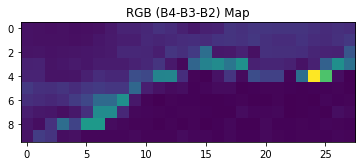

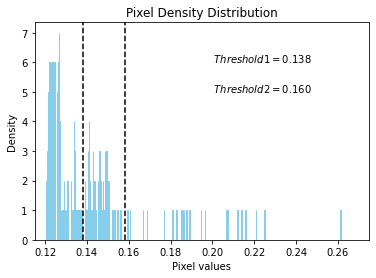

In [ ]:
from matplotlib import pyplot as plt
# Use imshow plot image.
#print(ifirstA.shape)
#print(ifirstA)

fig = plt.imshow(ifirstA)
plt.title('RGB (B4-B3-B2) Map')



# Display the results.
plt.show()
#plt.hist(ifirstA);
plt.xlabel('Pixel values')
plt.ylabel('Density')
plt.title('Pixel Density Distribution')
plt.text(0.20, 6, r'$\, Threshold1=0.138$')
plt.text(0.20, 5, r'$\, Threshold2=0.160$')
plt.hist(ifirstA, 30, align='mid', ec="skyblue")

plt.xlim(xmin=0.115, xmax = 0.275)
plt.axvline(0.138,color='k', linestyle='--')
plt.axvline(0.158,color='k', linestyle='--')


#print(ifirstA.max())
#print(ifirstA.min())

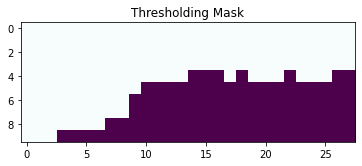

In [ ]:
import numpy as np
#B = np.where(ifirstA <= 0.138, 1, 0 and ifirstA> 160,0,1)
matrix =[[]]
matrix=[[1, 1 ,1 ,1 ,1, 1, 1 ,1 ,1 ,1, 1 ,1 ,1 ,1, 1, 1 ,1, 1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1, 1, 1 ,1 ,1 ,1, 1, 1 ,1, 1 ,1 ,1, 1 ,1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
#print(matrix)
#print(B.min())
#print(B.max())

fig = plt.imshow(matrix, cmap="BuPu_r")
plt.title('Thresholding Mask')
# Display the results.
plt.show()

(10, 28)
[[0.1279  0.1279  0.1248  0.1248  0.1248  0.12725 0.12725 0.12725 0.1279
  0.1279  0.1279  0.1279  0.1273  0.1273  0.1273  0.1325  0.1325  0.1325
  0.1304  0.1304  0.1304  0.124   0.124   0.124   0.124   0.1253  0.1253
  0.1253 ]
 [0.1314  0.1314  0.1282  0.1282  0.1282  0.13    0.13    0.13    0.13
  0.13    0.13    0.13    0.131   0.131   0.131   0.1289  0.1289  0.1289
  0.1309  0.1309  0.1309  0.1319  0.1319  0.1319  0.1319  0.1313  0.1313
  0.1313 ]
 [0.1314  0.1314  0.1282  0.1282  0.1282  0.13    0.13    0.13    0.13
  0.13    0.13    0.13    0.131   0.131   0.131   0.1289  0.1289  0.1289
  0.1309  0.1309  0.1309  0.1319  0.1319  0.1319  0.1319  0.1313  0.1313
  0.1313 ]
 [0.13775 0.13775 0.13555 0.13555 0.13555 0.13235 0.13235 0.13235 0.13235
  0.129   0.129   0.129   0.1285  0.1285  0.1285  0.1276  0.1276  0.1276
  0.13015 0.13015 0.13015 0.13015 0.1322  0.1322  0.1322  0.1232  0.1232
  0.1232 ]
 [0.13775 0.13775 0.13555 0.13555 0.13555 0.13235 0.13235 0.13235 0.13235


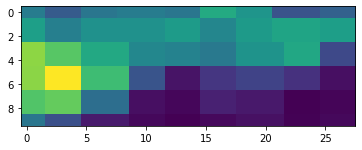

0.1418
0.1179


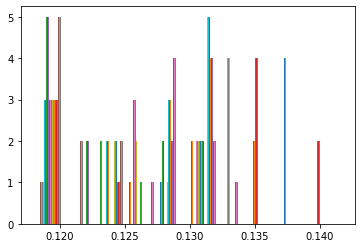

In [ ]:
from matplotlib import pyplot as plt
# Use imshow plot image.
print(isecondA.shape)
print(isecondA)
fig = plt.imshow(isecondA)

# Display the results.
plt.show()
plt.hist(isecondA);
print(isecondA.max())
print(isecondA.min())

(10, 28)
[[0.1306  0.1306  0.131   0.131   0.131   0.1324  0.1324  0.1324  0.1342
  0.1342  0.1342  0.1342  0.1357  0.1357  0.1357  0.1403  0.1403  0.1403
  0.1353  0.1353  0.1353  0.17375 0.17375 0.17375 0.17375 0.1845  0.1845
  0.1845 ]
 [0.1343  0.1343  0.1314  0.1314  0.1314  0.1336  0.1336  0.1336  0.1371
  0.1371  0.1371  0.1371  0.1411  0.1411  0.1411  0.1401  0.1401  0.1401
  0.1377  0.1377  0.1377  0.1809  0.1809  0.1809  0.1809  0.18665 0.18665
  0.18665]
 [0.1343  0.1343  0.1314  0.1314  0.1314  0.1336  0.1336  0.1336  0.1371
  0.1371  0.1371  0.1371  0.1411  0.1411  0.1411  0.1401  0.1401  0.1401
  0.1377  0.1377  0.1377  0.1809  0.1809  0.1809  0.1809  0.18665 0.18665
  0.18665]
 [0.1433  0.1433  0.1383  0.1383  0.1383  0.1349  0.1349  0.1349  0.1349
  0.1377  0.1377  0.1377  0.1389  0.1389  0.1389  0.1403  0.1403  0.1403
  0.2013  0.2013  0.2013  0.2013  0.20215 0.20215 0.20215 0.18795 0.18795
  0.18795]
 [0.1433  0.1433  0.1383  0.1383  0.1383  0.1349  0.1349  0.1349  0.

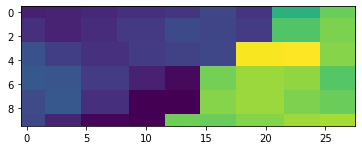

0.20215
0.1236


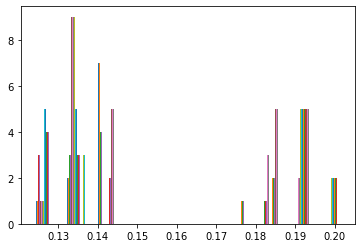

In [ ]:
from matplotlib import pyplot as plt
# Use imshow plot image.
print(ithirdA.shape)
print(ithirdA)
fig = plt.imshow(ithirdA)

# Display the results.
plt.show()
plt.hist(ithirdA);
print(ithirdA.max())
print(ithirdA.min())

(10, 28)
[[0.1935  0.1935  0.1818  0.1818  0.1818  0.1776  0.1776  0.1776  0.17505
  0.17505 0.17505 0.17505 0.1851  0.1851  0.1851  0.1844  0.1844  0.1844
  0.183   0.183   0.183   0.1847  0.1847  0.1847  0.1847  0.1847  0.1847
  0.1847 ]
 [0.1952  0.1952  0.1892  0.1892  0.1892  0.1904  0.1904  0.1904  0.1873
  0.1873  0.1873  0.1873  0.1877  0.1877  0.1877  0.191   0.191   0.191
  0.1855  0.1855  0.1855  0.183   0.183   0.183   0.183   0.1867  0.1867
  0.1867 ]
 [0.1952  0.1952  0.1892  0.1892  0.1892  0.1904  0.1904  0.1904  0.1873
  0.1873  0.1873  0.1873  0.1877  0.1877  0.1877  0.191   0.191   0.191
  0.1855  0.1855  0.1855  0.183   0.183   0.183   0.183   0.1867  0.1867
  0.1867 ]
 [0.1875  0.1875  0.1864  0.1864  0.1864  0.1907  0.1907  0.1907  0.1907
  0.2059  0.2059  0.2059  0.2081  0.2081  0.2081  0.196   0.196   0.196
  0.1941  0.1941  0.1941  0.1941  0.1969  0.1969  0.1969  0.1959  0.1959
  0.1959 ]
 [0.1875  0.1875  0.1864  0.1864  0.1864  0.1907  0.1907  0.1907  0.1907


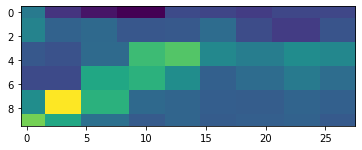

0.2201
0.17505


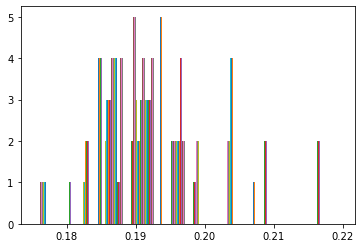

In [ ]:
from matplotlib import pyplot as plt
# Use imshow plot image.
print(ifourthA.shape)
print(ifourthA)
fig = plt.imshow(ifourthA)

# Display the results.
plt.show()
plt.hist(ifourthA);
print(ifourthA.max())
print(ifourthA.min())

(10, 28)
[[0.1645 0.1645 0.1639 0.1639 0.1639 0.1646 0.1646 0.1646 0.1651 0.1651
  0.1651 0.1651 0.1641 0.1641 0.1641 0.1688 0.1688 0.1688 0.1689 0.1689
  0.1689 0.17   0.17   0.17   0.17   0.1681 0.1681 0.1681]
 [0.1657 0.1657 0.1653 0.1653 0.1653 0.1662 0.1662 0.1662 0.1688 0.1688
  0.1688 0.1688 0.1697 0.1697 0.1697 0.1744 0.1744 0.1744 0.1692 0.1692
  0.1692 0.1732 0.1732 0.1732 0.1732 0.1748 0.1748 0.1748]
 [0.1657 0.1657 0.1653 0.1653 0.1653 0.1662 0.1662 0.1662 0.1688 0.1688
  0.1688 0.1688 0.1697 0.1697 0.1697 0.1744 0.1744 0.1744 0.1692 0.1692
  0.1692 0.1732 0.1732 0.1732 0.1732 0.1748 0.1748 0.1748]
 [0.1732 0.1732 0.168  0.168  0.168  0.1691 0.1691 0.1691 0.1691 0.1889
  0.1889 0.1889 0.1787 0.1787 0.1787 0.1731 0.1731 0.1731 0.1727 0.1727
  0.1727 0.1727 0.1948 0.1948 0.1948 0.1799 0.1799 0.1799]
 [0.1732 0.1732 0.168  0.168  0.168  0.1691 0.1691 0.1691 0.1691 0.1889
  0.1889 0.1889 0.1787 0.1787 0.1787 0.1731 0.1731 0.1731 0.1727 0.1727
  0.1727 0.1727 0.1948 0.1948 0.194

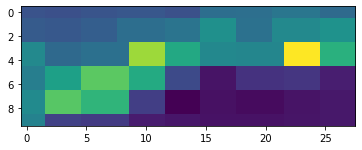

0.1948
0.154


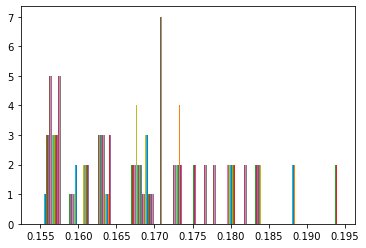

In [ ]:
from matplotlib import pyplot as plt
# Use imshow plot image.
print(ifirst.shape)
print(ifirst)
fig = plt.imshow(ifirst)

# Display the results.
plt.show()
plt.hist(ifirst);
print(ifirst.max())
print(ifirst.min())

[[0.1279  0.1279  0.1248  0.1248  0.1248  0.12725 0.12725 0.12725 0.1279
  0.1279  0.1279  0.1279  0.1273  0.1273  0.1273  0.1325  0.1325  0.1325
  0.1304  0.1304  0.1304  0.124   0.124   0.124   0.124   0.1253  0.1253
  0.1253 ]
 [0.1314  0.1314  0.1282  0.1282  0.1282  0.13    0.13    0.13    0.13
  0.13    0.13    0.13    0.131   0.131   0.131   0.1289  0.1289  0.1289
  0.1309  0.1309  0.1309  0.1319  0.1319  0.1319  0.1319  0.1313  0.1313
  0.1313 ]
 [0.1314  0.1314  0.1282  0.1282  0.1282  0.13    0.13    0.13    0.13
  0.13    0.13    0.13    0.131   0.131   0.131   0.1289  0.1289  0.1289
  0.1309  0.1309  0.1309  0.1319  0.1319  0.1319  0.1319  0.1313  0.1313
  0.1313 ]
 [0.13775 0.13775 0.13555 0.13555 0.13555 0.13235 0.13235 0.13235 0.13235
  0.129   0.129   0.129   0.1285  0.1285  0.1285  0.1276  0.1276  0.1276
  0.13015 0.13015 0.13015 0.13015 0.1322  0.1322  0.1322  0.1232  0.1232
  0.1232 ]
 [0.13775 0.13775 0.13555 0.13555 0.13555 0.13235 0.13235 0.13235 0.13235
  0.129  

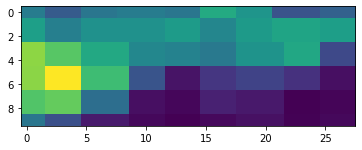

0.1418
0.1179


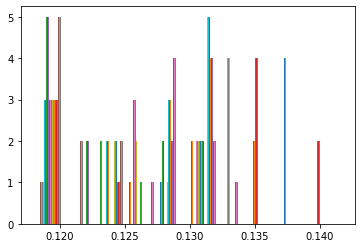

In [ ]:
from matplotlib import pyplot as plt
print(isecond)
# Use imshow plot image.
fig = plt.imshow(isecond)

# Display the results.
plt.show()
plt.hist(isecond);
print(isecond.max())
print(isecond.min())

[[0.1306  0.1306  0.131   0.131   0.131   0.1324  0.1324  0.1324  0.1342
  0.1342  0.1342  0.1342  0.1357  0.1357  0.1357  0.1403  0.1403  0.1403
  0.1353  0.1353  0.1353  0.17375 0.17375 0.17375 0.17375 0.1845  0.1845
  0.1845 ]
 [0.1343  0.1343  0.1314  0.1314  0.1314  0.1336  0.1336  0.1336  0.1371
  0.1371  0.1371  0.1371  0.1411  0.1411  0.1411  0.1401  0.1401  0.1401
  0.1377  0.1377  0.1377  0.1809  0.1809  0.1809  0.1809  0.18665 0.18665
  0.18665]
 [0.1343  0.1343  0.1314  0.1314  0.1314  0.1336  0.1336  0.1336  0.1371
  0.1371  0.1371  0.1371  0.1411  0.1411  0.1411  0.1401  0.1401  0.1401
  0.1377  0.1377  0.1377  0.1809  0.1809  0.1809  0.1809  0.18665 0.18665
  0.18665]
 [0.1433  0.1433  0.1383  0.1383  0.1383  0.1349  0.1349  0.1349  0.1349
  0.1377  0.1377  0.1377  0.1389  0.1389  0.1389  0.1403  0.1403  0.1403
  0.2013  0.2013  0.2013  0.2013  0.20215 0.20215 0.20215 0.18795 0.18795
  0.18795]
 [0.1433  0.1433  0.1383  0.1383  0.1383  0.1349  0.1349  0.1349  0.1349
  0.

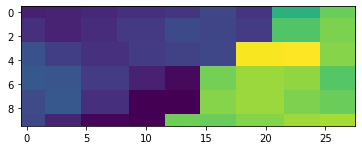

0.20215
0.1236


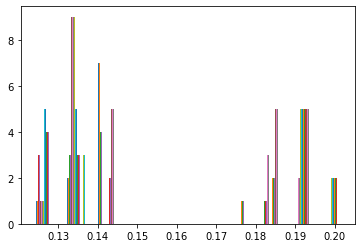

In [ ]:
from matplotlib import pyplot as plt
# Use imshow plot image.
print(ithird)
fig = plt.imshow(ithird)

# Display the results.
plt.show()
plt.hist(ithird);
print(ithird.max())
print(ithird.min())

[[ 0.05363332  0.05363332 -0.36262584 -0.36262584 -0.36262584 -0.51205206
  -0.51205206 -0.51205206 -0.60277486 -0.60277486 -0.60277486 -0.60277486
  -0.24521907 -0.24521907 -0.24521907 -0.27012333 -0.27012333 -0.27012333
  -0.31993243 -0.31993243 -0.31993243 -0.2594504  -0.2594504  -0.2594504
  -0.2594504  -0.2594504  -0.2594504  -0.2594504 ]
 [ 0.11411535  0.11411535 -0.0993507  -0.0993507  -0.0993507  -0.05665727
  -0.05665727 -0.05665727 -0.1669484  -0.1669484  -0.1669484  -0.1669484
  -0.15271711 -0.15271711 -0.15271711 -0.03531084 -0.03531084 -0.03531084
  -0.23098828 -0.23098828 -0.23098828 -0.31993243 -0.31993243 -0.31993243
  -0.31993243 -0.18829487 -0.18829487 -0.18829487]
 [ 0.11411535  0.11411535 -0.0993507  -0.0993507  -0.0993507  -0.05665727
  -0.05665727 -0.05665727 -0.1669484  -0.1669484  -0.1669484  -0.1669484
  -0.15271711 -0.15271711 -0.15271711 -0.03531084 -0.03531084 -0.03531084
  -0.23098828 -0.23098828 -0.23098828 -0.31993243 -0.31993243 -0.31993243
  -0.31993243

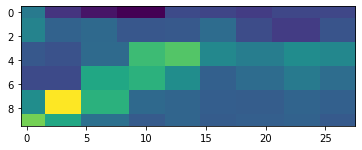

5.0
-0.60277486
1.0


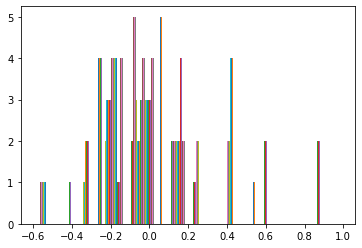

In [ ]:
from matplotlib import pyplot as plt
print(ifourth)
fig = plt.imshow(ifourth)

# Display the results.
plt.show()
y, x, _ = plt.hist(ifourth);
print(y.max())
print(x.min())
print(x.max())


start it from here

In [ ]:
https://drive.google.com/file/d/1h37UJRWa4f9YdRVgFVFkhB9JPkd0OiQQ/view?usp=sharing
image_file = "/content/imageToDriveExampleCSV.tif"
satdat = rasterio.open(image_file)

odict_keys(['lon', 'time', 'lat', 'zos'])
380
1287
1


TypeError: ignored

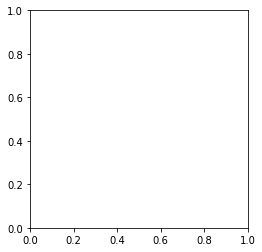

In [ ]:
!pip install netCDF4
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import numpy as np
fp='med00-cmcc-ssh-an-fc-d_1590166049313.nc'
ncfile = netCDF4.Dataset(fp) #
#print(ncfile.dimensions)
print(ncfile.variables.keys())
#print(ncfile.variables['zos'])
# Read in the file
time = ncfile.variables['time']
lon = ncfile.variables['lon']
lat = ncfile.variables['lat']
ssh = ncfile.variables['zos']

IR=ncfile.variables['lon'][0]
IR2=ncfile.variables['time'][0]
IR3=ncfile.variables['lat'][0]
IR4=ncfile.variables['zos']
lat = np.asarray(lat[:])
lon = np.asarray(lon[:])
zos= np.asarray(ssh[:])
print(len(lat))
print(len(lon))
print(len(ssh))
plt.imshow(lat)

In [ ]:
IR=ncfile.variables['lon'][0]
IR2=ncfile.variables['time'][0]
IR3=ncfile.variables['lat'][0]
IR4=ncfile.variables['zos'][0]
print(IR)
print(IR2)
print(IR3)
print(IR4)


NameError: ignored

In [ ]:
print(len(ncfile.variables['lat']))
print(len(ncfile.variables['zos'][0]))
for i in range(379):
    IR=ncfile.variables['lon'][i+1]
    IR2=ncfile.variables['lat'][i+1]
    IR3=ncfile.variables['zos'][i+1]
    print("Total score for %d is %d  ", IR, IR2)
    print("Total score for %d   ", IR3)

 

380
380


IndexError: ignored

In [ ]:
print(ncfile.variables.keys()) # get all variable names
for d in ncfile.dimensions.items():
    print(d)

odict_keys(['latitude', 'longitude', 'depth', 'deptho_lev', 'mask', 'deptho'])
('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 380)
('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 1287)
('depth', <class 'netCDF4._netCDF4.Dimension'>: name = 'depth', size = 141)


In [ ]:
# Each variable has a dimensions and a shape attribute.
time = ncfile.variables['zos']  
print(time)


KeyError: ignored

In [ ]:
 #shape attribute.
print(time.shape)

(1,)


In [ ]:
# Each variable has a dimensions and a shape attribute.

downloaded = drive.CreateFile({'id':"1a0w9Qh3-y3gnAGDu17XnAczqrEIx9nzG"})   # replace the id with id of file you want to access
downloaded.GetContentFile('MED-MFC_006_013_coordinates.nc')
fp='MED-MFC_006_013_coordinates.nc'
ncfile = netCDF4.Dataset(fp) #
print(ncfile.variables.keys())


odict_keys(['e1t', 'e2t', 'e3t', 'latitude', 'longitude', 'depth'])


In [ ]:

downloaded = drive.CreateFile({'id':"1e2hwjPJmiXSTCte9JT2ZG1CXKmqXq6Km"})   # replace the id with id of file you want to access
downloaded.GetContentFile('MED-MFC_006_013_mask_bathy.nc')
fp='MED-MFC_006_013_mask_bathy.nc'
ncfile = netCDF4.Dataset(fp) #
print(ncfile.variables.keys())


odict_keys(['latitude', 'longitude', 'depth', 'deptho_lev', 'mask', 'deptho'])


OSError: ignored


Accessing data from a netCDF variable object

    netCDF variables objects behave much like numpy arrays.
    slicing a netCDF variable object returns a numpy array with the data.
    Boolean array and integer sequence indexing behaves differently for netCDF variables than for numpy arrays. Only 1-d boolean arrays and integer sequences are allowed, and these indices work independently along each dimension (similar to the way vector subscripts work in fortran).



In [ ]:
lat = lat[:]  # Reads the netCDF variable MT, array of one element
print(lat)

[30.1875   30.229166 30.270834 30.3125   30.354166 30.395834 30.4375
 30.479166 30.520834 30.5625   30.604166 30.645834 30.6875   30.729166
 30.770834 30.8125   30.854166 30.895834 30.9375   30.979166 31.020834
 31.0625   31.104166 31.145834 31.1875   31.229166 31.270834 31.3125
 31.354166 31.395834 31.4375   31.479166 31.520834 31.5625   31.604166
 31.645834 31.6875   31.729166 31.770834 31.8125   31.854166 31.895834
 31.9375   31.979166 32.020832 32.0625   32.104168 32.145832 32.1875
 32.229168 32.270832 32.3125   32.354168 32.395832 32.4375   32.479168
 32.520832 32.5625   32.604168 32.645832 32.6875   32.729168 32.770832
 32.8125   32.854168 32.895832 32.9375   32.979168 33.020832 33.0625
 33.104168 33.145832 33.1875   33.229168 33.270832 33.3125   33.354168
 33.395832 33.4375   33.479168 33.520832 33.5625   33.604168 33.645832
 33.6875   33.729168 33.770832 33.8125   33.854168 33.895832 33.9375
 33.979168 34.020832 34.0625   34.104168 34.145832 34.1875   34.229168
 34.270832 34.31

In [ ]:
lon = ncfile.variables['lon'] 
lon = lon[:]  # Reads the netCDF variable lon, array of one element
print(lon)

KeyError: ignored

In [ ]:
downloaded = drive.CreateFile({'id':"1a0w9Qh3-y3gnAGDu17XnAczqrEIx9nzG"})   # replace the id with id of file you want to access
downloaded.GetContentFile('MED-MFC_006_013_coordinates.nc')
fp='MED-MFC_006_013_coordinates.nc'
ncfile = netCDF4.Dataset(fp) #
print(ncfile.variables.keys())
lat = ncfile.variables['latitude'] 
lon = ncfile.variables['longitude'] 
depth = ncfile.variables['depth'] 
#print(lat[:])
#print(lon[:])
#print(depth[:])
print(lat.shape)

InvalidConfigError: ignored


**What is the sea surface temperature and salinity at 50N, 140W?**
Finding the latitude and longitude indices of 50N, 140W

    
    Use the auxilary coordinate variables named in the coordinates variable attribute, Latitude and Longitude



In [ ]:
lat_new = np.array(lat)


In [ ]:
lat_new[0:3]

array([30.1875  , 30.229166, 30.270834], dtype=float32)

In [ ]:
# extract lat/lon values (in degrees) to numpy arrays
import numpy as np

latvals = lat[:]; lonvals = lon[:]
#latvals = np.asarray(latvals[:])
#lonvals = np.asarray(lonvals[:])
#zos = np.asarray(ssh[:])
# a function to find the index of the point closest pt
# (in squared distance) to give lat/lon value.
def getclosest_ij(lats,lons,latpt,lonpt):
 # find squared distance of every point on grid
 dist_sq = (lats-latpt)**2 + (lons-lonpt)**2
 # 1D index of minimum dist_sq element
 minindex_flattened = dist_sq.argmin()
 # Get 2D index for latvals and lonvals arrays from 1D index
 return np.unravel_index(minindex_flattened, lats.shape)
 
iy_min, ix_min = getclosest_ij(latvals, lonvals, 31, 20)
print(iy_min)
print(ix_min)

<class 'netCDF4._netCDF4.Variable'>


TypeError: ignored

In [ ]:
!pip install xarray
import xarray as xr
f = xr.open_dataset('med00-cmcc-ssh-an-fc-d_1590166049313.nc')
print(f)


time = f.variables['time']
ssh = f.variables['zos']
lat = f.variables['lat']
lon = f.variables['lon']


lat = np.asarray(lat[:])
lon = np.asarray(lon[:])
zos = np.asarray(ssh[:])

import numpy as np

latvals = lat; lonvals = lon
#print(latvals)

#zos = np.asarray(ssh[:])
# a function to find the index of the point closest pt
# (in squared distance) to give lat/lon value.
def getclosest_ij(lats,lons,latpt,lonpt):
 # find squared distance of every point on grid
 dist_sq = (lats-latpt)**2 + (lons-lonpt)**2
 # 1D index of minimum dist_sq element
 minindex_flattened = dist_sq.argmin()
 # Get 2D index for latvals and lonvals arrays from 1D index
 return np.unravel_index(minindex_flattened, lats.shape)
 
iy_min, ix_min = getclosest_ij(latvals, lonvals, 31, 20)
print(iy_min)
print(ix_min)


<xarray.Dataset>
Dimensions:  (lat: 380, lon: 1287, time: 1)
Coordinates:
  * lon      (lon) float32 -17.291666 -17.25 -17.208334 ... 36.25 36.291668
  * time     (time) datetime64[ns] 2020-05-31T12:00:00
  * lat      (lat) float32 30.1875 30.229166 30.270834 ... 45.9375 45.979168
Data variables:
    zos      (time, lat, lon) float32 ...
Attributes:
    comment:                         Please check in CMEMS catalogue the INFO...
    FROM_ORIGINAL_FILE__field_type:  daily_mean_centered_at_time_field
    title:                           Sea Surface Height (2D) - Daily Mean
    Conventions:                     CF-1.0
    source:                          MFS EAS5
    contact:                         servicedesk.cmems@mercator-ocean.eu
    references:                      Please check in CMEMS catalogue the INFO...
    bulletin_type:                   forecast
    bulletin_date:                   20200522
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    _

ValueError: ignored

In [ ]:

!pip install Py6S
!pip install atmos
import ee
from Py6S import *
import datetime
import math
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),'bin'))
from atmospheric import Atmospheric

ee.Initialize()



ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


ModuleNotFoundError: ignored